## Visualizing the distribution of a dataset
* https://seaborn.pydata.org/tutorial/distributions.html

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')
sns.set()

## Plotting univariate distributions

<AxesSubplot:ylabel='Density'>

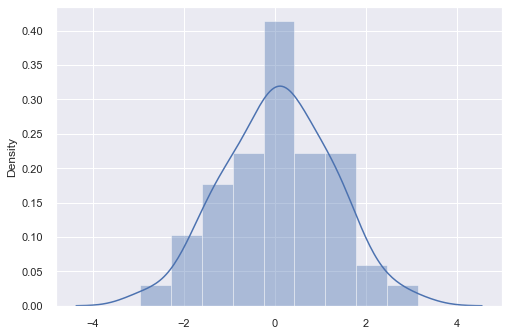

In [2]:
x = np.random.normal(size=100)

sns.distplot(x)


### Histograms

<AxesSubplot:>

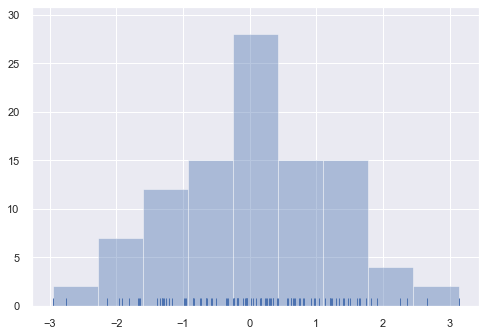

In [3]:
sns.distplot(x, kde=False, rug=True)


<AxesSubplot:>

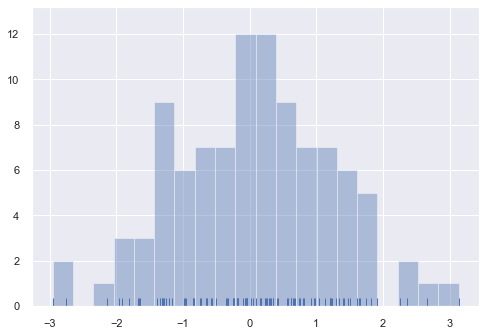

In [4]:
sns.distplot(x, bins=20, kde=False, rug=True)


### Kernel density estimation

<AxesSubplot:ylabel='Density'>

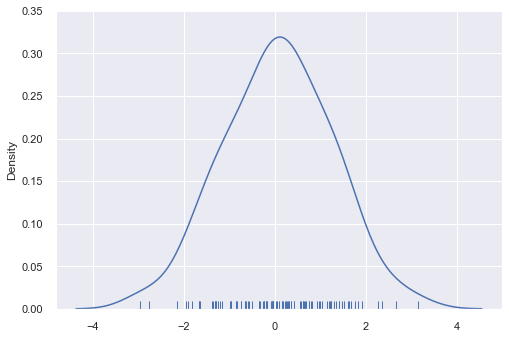

In [5]:
sns.distplot(x, hist=False, rug=True)


<AxesSubplot:ylabel='Density'>

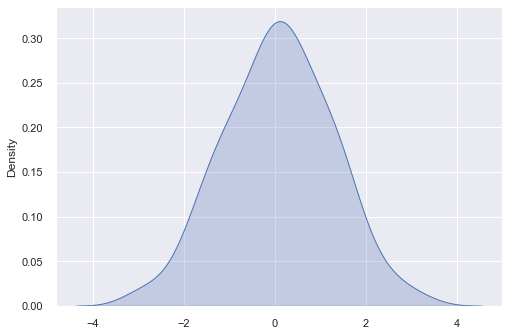

In [6]:
sns.kdeplot(x, shade=True)


<AxesSubplot:ylabel='Density'>

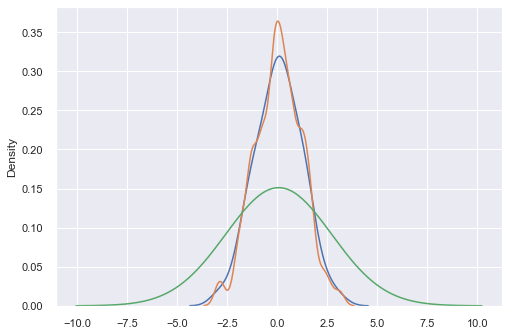

In [7]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")


<AxesSubplot:ylabel='Density'>

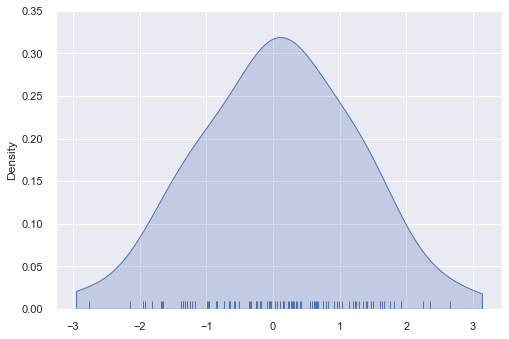

In [8]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)


In [9]:
x = np.random.gamma(6, size=200)


<AxesSubplot:ylabel='Density'>

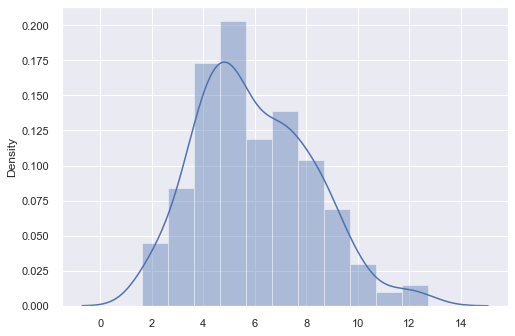

In [10]:
sns.distplot(x)


<AxesSubplot:>

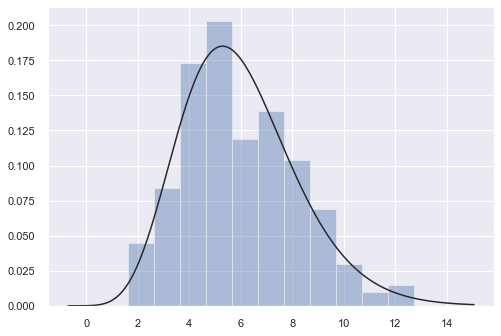

In [11]:
sns.distplot(x, kde=False, fit=stats.gamma)


### Plotting bivariate distributions

In [12]:
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()


,x,y
0,0.184405,1.320788
1,0.706082,0.581755
2,0.538921,0.973746
3,-0.154721,1.599569
4,0.794043,1.491807


<AxesSubplot:xlabel='y', ylabel='Density'>

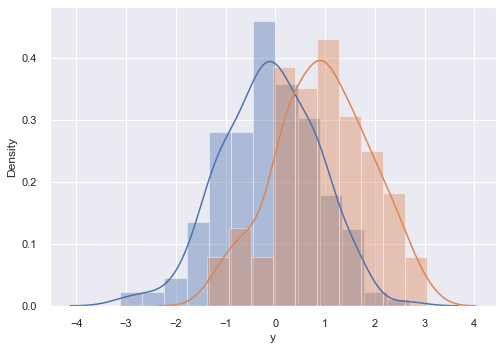

In [13]:
sns.distplot(df["x"])
sns.distplot(df["y"])


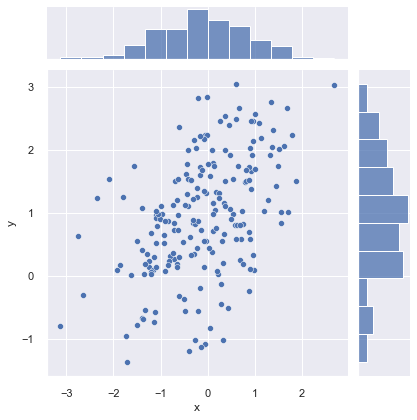

In [14]:
# sns.jointplot(df["x"], df["y"])
sns.jointplot(x="x", y="y", data=df)


#### Hexbin plots

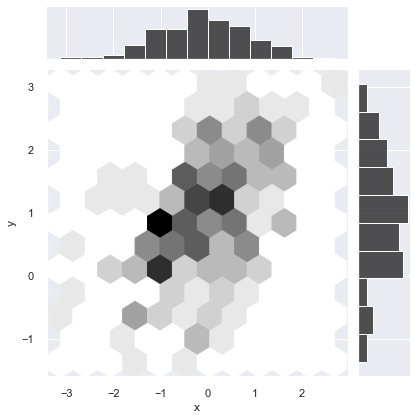

In [15]:
sns.jointplot(x="x", y="y", data=df, kind="hex", color="k")


#### Kernel density estimation

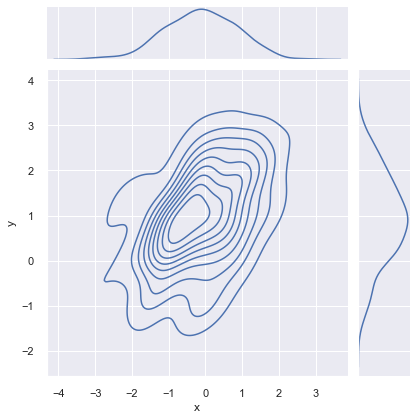

In [16]:
sns.jointplot(x="x", y="y", data=df, kind="kde")


<AxesSubplot:xlabel='x', ylabel='y'>

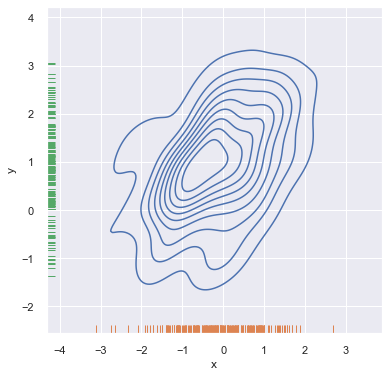

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df["x"], df["y"])
sns.rugplot(df["x"])
sns.rugplot(df["y"], color="g", vertical=True)


<AxesSubplot:xlabel='x', ylabel='y'>

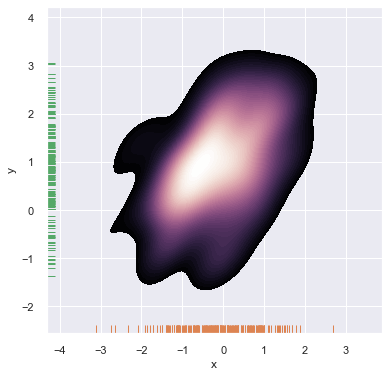

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df["x"], df["y"], cmap=cmap, n_levels=60, shade=True)
sns.rugplot(df["x"])
sns.rugplot(df["y"], color="g", vertical=True)


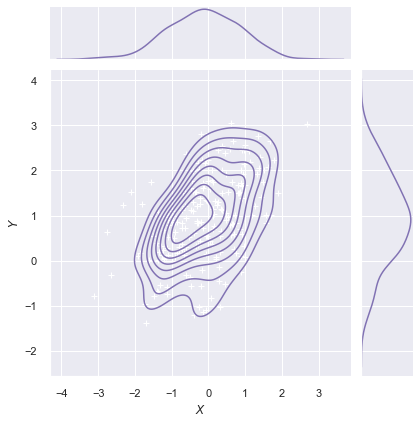

In [19]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")


### Visualizing pairwise relationships in a dataset

* [Paired density and scatterplot matrix — seaborn documentation](https://seaborn.pydata.org/examples/pair_grid_with_kde.html)

In [20]:
iris = sns.load_dataset("iris")
iris.groupby(["species"]).mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


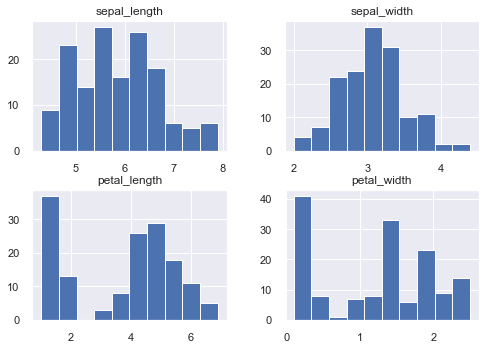

In [21]:
h = iris.hist()


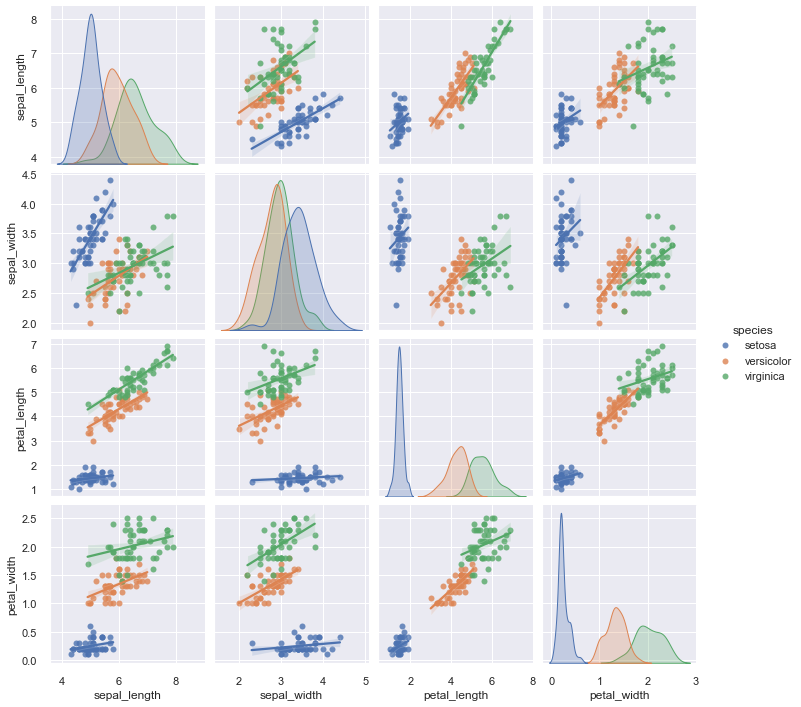

In [22]:
sns.pairplot(iris, hue="species", kind="reg")


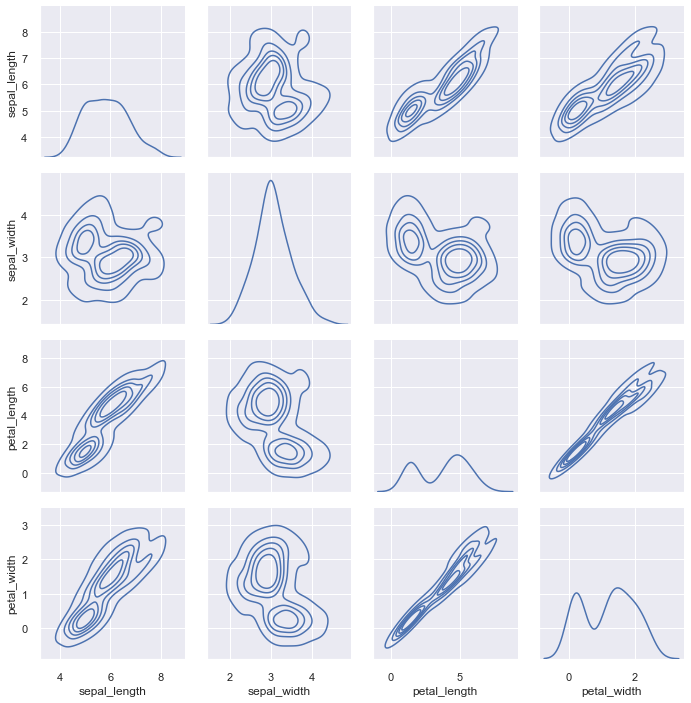

In [23]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)


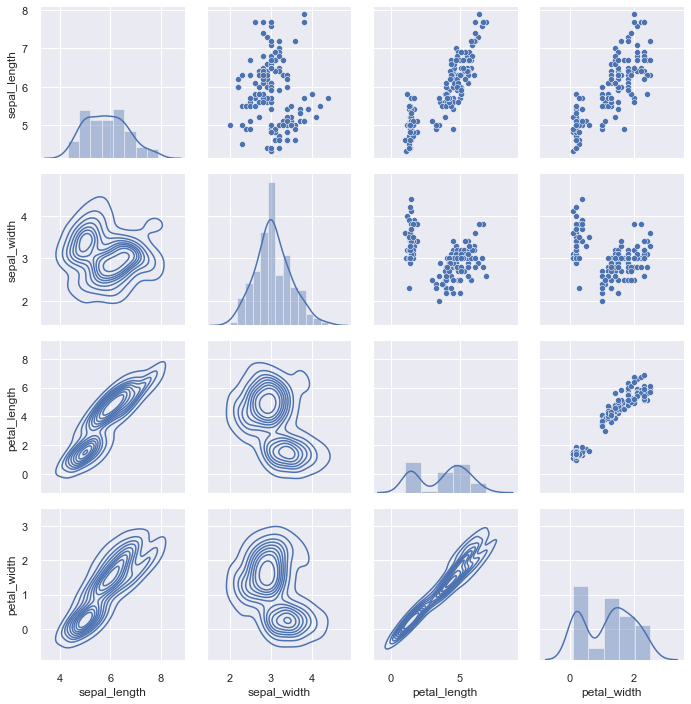

In [24]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")


In [25]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### ridgeplot

* [Overlapping densities (‘ridge plot’) — seaborn documentation](https://seaborn.pydata.org/examples/kde_ridgeplot.html)

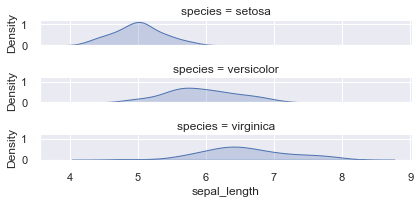

In [26]:
g = sns.FacetGrid(iris, row="species", height=1, aspect=6)
g.map(sns.kdeplot, "sepal_length", shade=True)
